In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt
import numpy as np
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [2]:
df = pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
display(df.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Prints the names of the features
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [4]:
# Let's check for null values
print(pd.isnull(df).sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Text(0.5, 1.0, 'Time Signature Distribution')

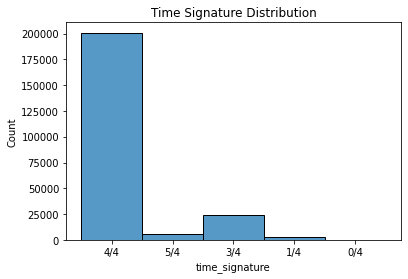

In [5]:
# There are no null values, thus there's no need to perform any kind of operation
# in order to handle the missing values
sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Tracks with a 0/4 time signature: 8


Text(0.5, 1.0, 'Time Signature Distribution')

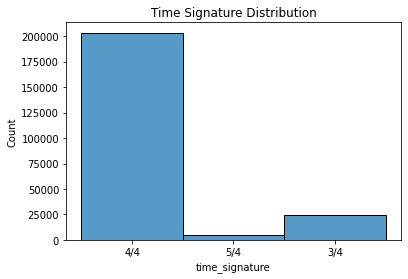

In [6]:
# The samples in the dataframe where the field 'time_signature' is '1/4'
# actually represent songs with mostly a 4/4 time signature, since it is
# most likely an error by who created the dataframe we're going to change it
# to the '4/4' value
df['time_signature'] = df['time_signature'].replace(['1/4'],'4/4')

print("Tracks with a 0/4 time signature: %s" % len(df[df['time_signature'] == '0/4']));
# Since there are just 8 samples with a '0/4' time signature,
# and since it is clearly an error, I'm going to simply delete them
df = df[df['time_signature'] != '0/4']

sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Text(0.5, 1.0, 'Genre Distribution')

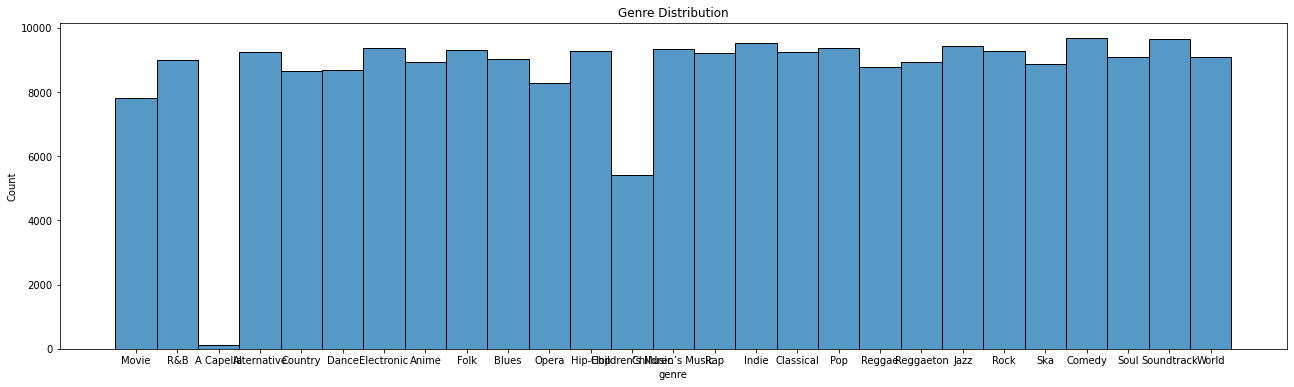

In [7]:
plt.figure(figsize=(22, 6))
sns.histplot(df['genre']).set_title('Genre Distribution')

Classical Tracks number: 9256
Pop Tracks number: 9385
Folk Tracks number: 9299
Total Tracks number: 27940


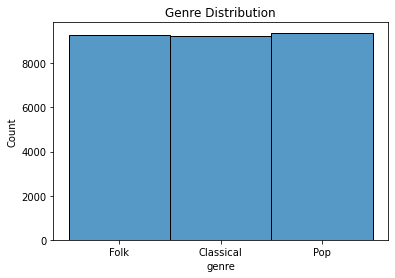

In [8]:
# i'm going to pick the three genres of the Philip Tagg's axiomatic triangle:
# Classical, Pop and Folk, as we can see they are pretty balanced

taggGenres = ['Classical','Pop','Folk']
df = df[df.genre.isin(taggGenres)];
sns.histplot(df['genre']).set_title('Genre Distribution')

print("Classical Tracks number: %s" % len(df[df['genre'] == 'Classical']));
print("Pop Tracks number: %s" % len(df[df['genre'] == 'Pop']));
print("Folk Tracks number: %s" % len(df[df['genre'] == 'Folk']));

print("Total Tracks number: %s" % len(df));

Text(0.5, 1.0, 'Key usage for every genre')

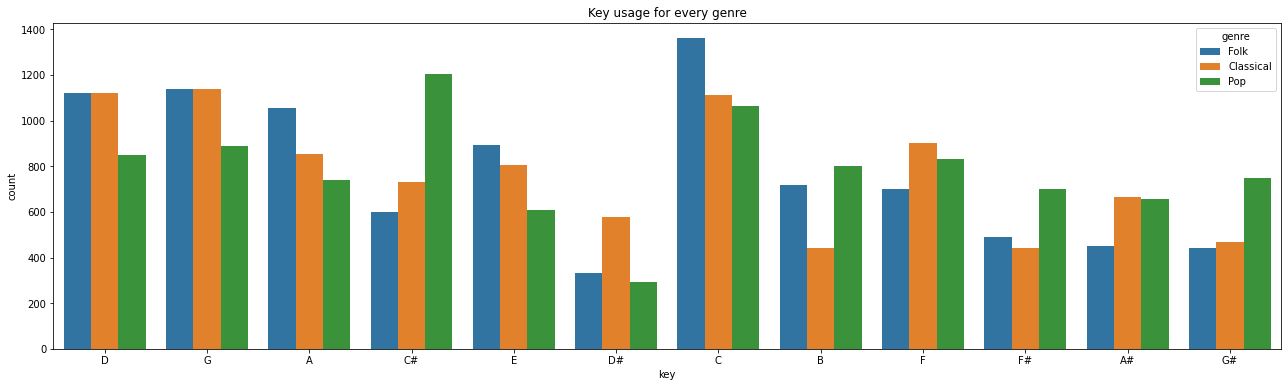

In [9]:
plt.figure(figsize=(22, 6))
sns.countplot(x = 'key', hue = 'genre', data = df)
plt.title('Key usage for every genre')
# This is the distribution of key usage for every genre, I decided at the end to drop this and the mode
# features since they don't have much meaning in a genre prediction

In [10]:
# Let's now remove the unnecessary features
new_df = df.drop(['artist_name','track_name','track_id','popularity','key','mode','duration_ms'],axis = 1)
# Make a one hot encoding of the time signature
new_df.time_signature = new_df.time_signature.map( {'3/4':3 , '4/4':4, '5/4':5} )
new_df = pd.get_dummies(data= new_df, columns=['time_signature'])
# Shuffle the dataset
from sklearn.utils import shuffle
new_df = shuffle(new_df)
display(new_df.head())

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
126125,Classical,0.8570,0.177,0.1760,0.877000,0.1050,-17.595,0.0339,86.105,0.131,0,1,0
41818,Folk,0.9540,0.462,0.1870,0.847000,0.0985,-19.991,0.0304,140.096,0.252,0,1,0
41907,Folk,0.0234,0.786,0.6960,0.001900,0.0839,-5.796,0.0428,121.974,0.306,0,1,0
105278,Classical,0.9950,0.377,0.0187,0.881000,0.1200,-28.914,0.0451,70.708,0.114,0,1,0
150230,Pop,0.1390,0.963,0.8000,0.000458,0.1070,-6.803,0.0964,119.947,0.838,0,1,0


In [11]:
features = new_df.keys().drop(['genre']);
display(features)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature_3', 'time_signature_4', 'time_signature_5'],
      dtype='object')

In [12]:
# Let's divide the label (genre) from the rest of the dataset and divide the dataset ina training and a testing dataset
new_df.genre = new_df.genre.map( {'Classical':0 , 'Pop':1, 'Folk':2} )
training = new_df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['genre']
X_test = new_df.drop(training.index)[features]
y_test = new_df.drop(training.index)['genre']
display(X_train.head())
display(y_train.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
127177,0.83500,0.168,0.03880,0.088500,0.5310,-26.174,0.0387,80.688,0.1770,1,0,0
112828,0.00246,0.657,0.67900,0.000000,0.2110,-5.511,0.0269,120.007,0.3310,0,1,0
64359,0.38900,0.594,0.63300,0.000396,0.1070,-7.342,0.0625,106.016,0.5310,0,1,0
63933,0.57300,0.644,0.74000,0.000000,0.0696,-8.572,0.0658,120.182,0.3810,0,1,0
123987,0.99100,0.339,0.00778,0.899000,0.1080,-29.410,0.0445,72.548,0.0365,0,1,0


127177    0
112828    1
64359     2
63933     2
123987    0
Name: genre, dtype: int64

In [13]:
# Let's do a MinMaxScaling of the dataset to make all the features in [0,1]
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'
scaler = MinMaxScaler()
# Loudness goes from -60 to 0 db, I will convert it to a positive value before normalizing it 
X_train['loudness'] *= -1
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
display(X_train.head())
X_test['loudness'] *= -1
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
display(X_test.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
127177,0.838353,0.120289,0.038858,0.089124,0.524585,0.555802,0.017667,0.229428,0.178607,1.0,0.0,0.0
112828,0.002469,0.656004,0.680354,0.000000,0.198819,0.127402,0.004878,0.423508,0.334006,0.0,1.0,0.0
64359,0.390561,0.586985,0.634261,0.000399,0.092945,0.165364,0.043464,0.354448,0.535822,0.0,1.0,0.0
63933,0.575301,0.641762,0.741478,0.000000,0.054871,0.190865,0.047041,0.424372,0.384460,0.0,1.0,0.0
123987,0.994980,0.307625,0.007775,0.905337,0.093963,0.622893,0.023954,0.189248,0.036831,0.0,1.0,0.0


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
126125,0.860442,0.130149,0.176336,0.883182,0.090909,0.377936,0.012465,0.256166,0.132190,0.0,1.0,0.0
150924,0.309236,0.545355,0.361710,0.000008,0.087855,0.174051,0.003577,0.249666,0.294652,0.0,1.0,0.0
124878,0.975904,0.322962,0.081344,0.896274,0.085819,0.586714,0.041730,0.373205,0.551968,1.0,0.0,0.0
108543,0.656626,0.497152,0.513016,0.000000,0.134684,0.137707,0.284630,0.300616,0.437941,0.0,1.0,0.0
104322,0.890562,0.122480,0.066514,0.563948,0.184567,0.511973,0.025688,0.527087,0.081332,1.0,0.0,0.0


In [14]:
# Let's split the training set in training and a development set (here called validation)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

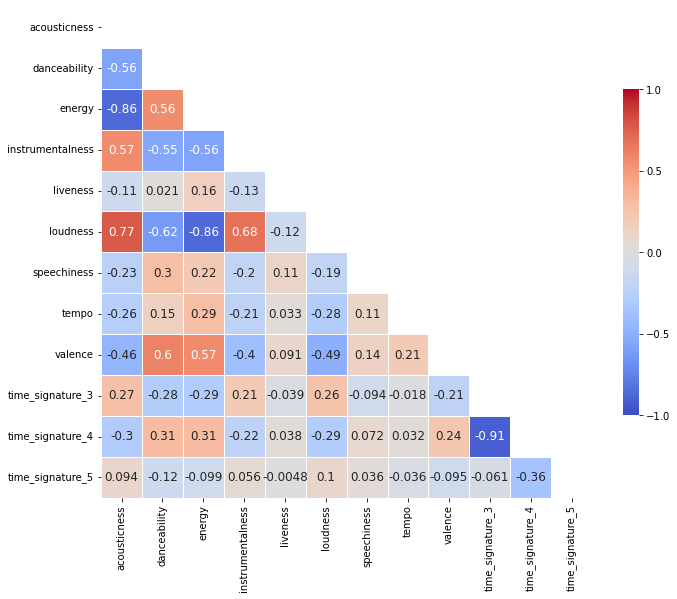

In [15]:
corr_heatmap(X_train)

In [16]:
# Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [17]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), param_grid = param_grid, verbose=10, n_jobs=-1, error_score="raise")
#best_clf = clf.fit(X_train, y_train)

In [18]:
#print(best_clf.best_estimator_)
#print(best_clf.cv_results_)
#print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')

In [19]:
# Thanks to GridSearch we know that the best choice is LogisticRegression(C=78.47599703514607, multi_class='multinomial', solver='newton-cg')
model = LogisticRegression(C=78.47599703514607, multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=78.47599703514607, multi_class='multinomial',
                   solver='newton-cg')

In [20]:
y_pred = model.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1491
           1       0.78      0.79      0.78      1503
           2       0.72      0.73      0.73      1477

    accuracy                           0.80      4471
   macro avg       0.80      0.80      0.80      4471
weighted avg       0.80      0.80      0.80      4471



In [21]:
# Let's try without loudness
X_train_loudness = X_train.drop(['loudness'], axis=1)
X_valid_loudness = X_valid.drop(['loudness'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_loudness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_loudness)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1491
           1       0.77      0.74      0.76      1503
           2       0.69      0.73      0.71      1477

    accuracy                           0.79      4471
   macro avg       0.79      0.79      0.79      4471
weighted avg       0.79      0.79      0.79      4471



In [22]:
# Let's try without energy
X_train_energy = X_train.drop(['energy'], axis=1)
X_valid_energy = X_valid.drop(['energy'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_energy, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_energy)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1491
           1       0.78      0.78      0.78      1503
           2       0.72      0.74      0.73      1477

    accuracy                           0.80      4471
   macro avg       0.81      0.80      0.80      4471
weighted avg       0.81      0.80      0.81      4471



In [23]:
# Let's try without acousticness
X_train_acousticness = X_train.drop(['acousticness'], axis=1)
X_valid_acousticness = X_valid.drop(['acousticness'], axis=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train_acousticness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_acousticness)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1491
           1       0.78      0.79      0.79      1503
           2       0.72      0.73      0.72      1477

    accuracy                           0.80      4471
   macro avg       0.80      0.80      0.80      4471
weighted avg       0.80      0.80      0.80      4471



In [24]:
# The accuracy changes between 0.81 and 0.79 in every situation, I'm going to just keep those features
# I will now test the data with X_test and y_test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1818
           1       0.79      0.80      0.79      1898
           2       0.72      0.74      0.73      1872

    accuracy                           0.80      5588
   macro avg       0.81      0.80      0.80      5588
weighted avg       0.80      0.80      0.80      5588



In [25]:
# We see that the accuracy doesn't change much
# We'll now try to get best results with a Neural Network
from sklearn.neural_network import MLPClassifier

mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [500]
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_valid)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_valid, t_pred))

In [26]:
# With GridSearch we can see that the estimatore whioch gives the best result is
# MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500)
# I will now perform a second Grid Search with hyperparameters more similar to the ones just found
# and with early stopping in order to be more precise
# I will merge train and valid sets and test on the testing set
X_train = pd.concat([X_train, X_valid])
y_train = pd.concat([y_train, y_valid])
X_train, y_train = shuffle(X_train, y_train)
parameter_space = {
    'hidden_layer_sizes': [(100, 100), (100, 150), (150, 150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.02, 0.04, 0.08],
    'early_stopping': [True, False],
    'max_iter': [500]
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_test)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_test, t_pred))

In [27]:
# Thanks to GridSearch we know that the best choice is MLPClassifier(alpha=0.01, hidden_layer_sizes=(150, 150), max_iter=500)
clf = MLPClassifier(alpha=0.01, hidden_layer_sizes=(150, 150), max_iter=500).fit(X_train, y_train)
y_pred=clf.predict(X_train)

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1818
           1       0.80      0.81      0.81      1898
           2       0.76      0.76      0.76      1872

    accuracy                           0.83      5588
   macro avg       0.83      0.83      0.83      5588
weighted avg       0.83      0.83      0.83      5588



In [29]:
# Usually the accuracy of the MLP is a bit better than the one of the Logistic Regression in this case